# Principal Component Analysis Assignment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [3]:
data = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv"
)

<IPython.core.display.Javascript object>

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [4]:
data

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,...,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,...,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,...,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79926,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,1,1,2,475174,...,1802.52,170.921,0.124,2.782,1.44,8.95,NaN,NaN,NaN,NaN
79927,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,1,2,2,475174,...,1591.22,173.371,-1.577,3.571,0.92,7.85,NaN,NaN,NaN,NaN
79928,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,2,2,2,475174,...,743.92,151.086,0.357,2.942,1.91,3.42,NaN,NaN,NaN,NaN
79929,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,2,2,2,475174,...,2239.31,173.146,0.565,2.027,1.35,11.15,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [5]:
columns = list(data.select_dtypes(include="number").columns)
columns.append("pitchType")
columns = [x for x in columns if "Id" not in x]
data2 = data[columns].copy()
data2.dtypes

inning                  int64
balls                   int64
strikes                 int64
outs                    int64
timesFaced              int64
probCalledStrike      float64
releaseVelocity       float64
spinRate              float64
spinDir               float64
locationHoriz         float64
locationVert          float64
movementHoriz         float64
movementVert          float64
battedBallAngle       float64
battedBallDistance    float64
pitchType              object
dtype: object

<IPython.core.display.Javascript object>

In [6]:
data2.isnull().sum() / data2.isnull().count()

inning                0.000000
balls                 0.000000
strikes               0.000000
outs                  0.000000
timesFaced            0.000000
probCalledStrike      0.000125
releaseVelocity       0.000000
spinRate              0.077529
spinDir               0.003891
locationHoriz         0.000000
locationVert          0.000000
movementHoriz         0.000000
movementVert          0.000000
battedBallAngle       0.818606
battedBallDistance    0.818606
pitchType             0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
data2.drop(columns=["battedBallAngle", "battedBallDistance"], inplace=True)
data2

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,pitchType
0,1,0,0,0,1,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,FF
1,1,0,1,0,1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,FT
2,1,0,2,0,1,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,FF
3,1,0,0,1,1,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,FT
4,1,0,1,1,1,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79926,9,1,1,2,1,0.989,92.5,1802.52,170.921,0.124,2.782,1.44,8.95,FF
79927,9,1,2,2,1,0.000,93.5,1591.22,173.371,-1.577,3.571,0.92,7.85,FF
79928,9,2,2,2,1,0.939,88.3,743.92,151.086,0.357,2.942,1.91,3.42,FC
79929,9,2,2,2,1,0.826,93.6,2239.31,173.146,0.565,2.027,1.35,11.15,FF


<IPython.core.display.Javascript object>

In [8]:
data2.isnull().sum() / data2.isnull().count()

inning              0.000000
balls               0.000000
strikes             0.000000
outs                0.000000
timesFaced          0.000000
probCalledStrike    0.000125
releaseVelocity     0.000000
spinRate            0.077529
spinDir             0.003891
locationHoriz       0.000000
locationVert        0.000000
movementHoriz       0.000000
movementVert        0.000000
pitchType           0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [9]:
data2.dropna(inplace=True)
data2.isnull().sum() / data2.isnull().count()

inning              0.0
balls               0.0
strikes             0.0
outs                0.0
timesFaced          0.0
probCalledStrike    0.0
releaseVelocity     0.0
spinRate            0.0
spinDir             0.0
locationHoriz       0.0
locationVert        0.0
movementHoriz       0.0
movementVert        0.0
pitchType           0.0
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
data2

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,pitchType
0,1,0,0,0,1,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,FF
1,1,0,1,0,1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,FT
2,1,0,2,0,1,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,FF
3,1,0,0,1,1,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,FT
4,1,0,1,1,1,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79926,9,1,1,2,1,0.989,92.5,1802.52,170.921,0.124,2.782,1.44,8.95,FF
79927,9,1,2,2,1,0.000,93.5,1591.22,173.371,-1.577,3.571,0.92,7.85,FF
79928,9,2,2,2,1,0.939,88.3,743.92,151.086,0.357,2.942,1.91,3.42,FC
79929,9,2,2,2,1,0.826,93.6,2239.31,173.146,0.565,2.027,1.35,11.15,FF


<IPython.core.display.Javascript object>

In [11]:
X = data2.drop("pitchType", axis=1)
y = data2.pitchType

<IPython.core.display.Javascript object>

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [12]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scale), columns=["pc0", "pc1"])
X_pca

,pc0,pc1
0,-1.833271,-0.559031
1,-1.969886,-0.378804
2,-1.501935,-0.535109
3,-1.738059,-0.428474
4,-1.744180,-0.286551
...,...,...
73720,-0.793648,-0.858302
73721,-1.057257,0.413321
73722,-0.088380,1.103026
73723,-0.642814,-1.024640


<IPython.core.display.Javascript object>

### Compute the explained variance for new data set.

In [13]:
pca.explained_variance_

array([2.40644312, 1.48635039])

<IPython.core.display.Javascript object>

### Generate a scatter plot that visualizes how the component values are distributed.

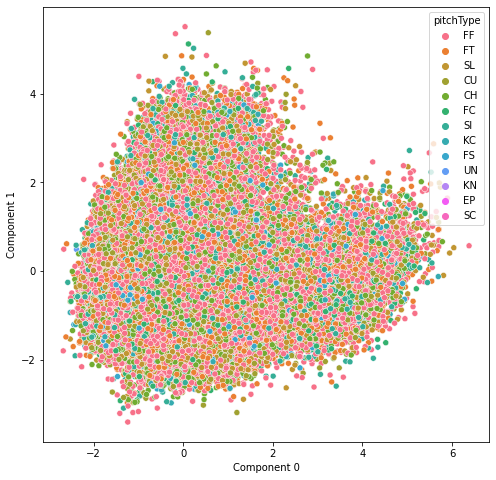

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca.pc0, y=X_pca.pc1, hue=y)
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.show()

### Create a line plot that shows the explained variance by number of components.

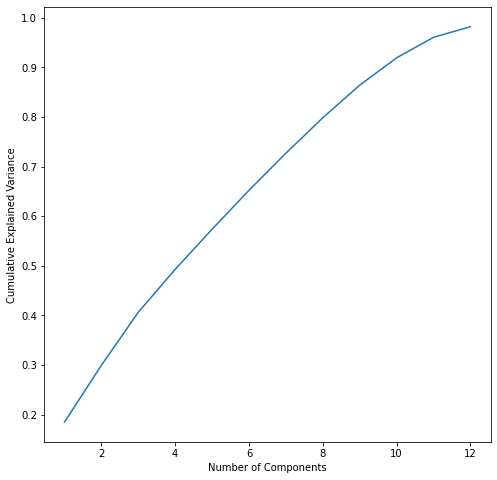

<IPython.core.display.Javascript object>

In [15]:
cumulative_variances = []
n_components = list(range(1, len(X.columns)))
for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(X_scale)
    cv = pca.explained_variance_ratio_.sum()
    cumulative_variances.append(cv)

plt.figure(figsize=(8, 8))
plt.plot(n_components, cumulative_variances)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [16]:
model = RandomForestClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

In [17]:
scores = []
n_components = list(range(1, len(X.columns)))
for i in n_components:
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scale)
    model.fit(X_pca, y)
    score = model.score(X_pca, y)
    scores.append(score)



<IPython.core.display.Javascript object>

### Create a line plot that shows the training scores across the different numbers of principal components.

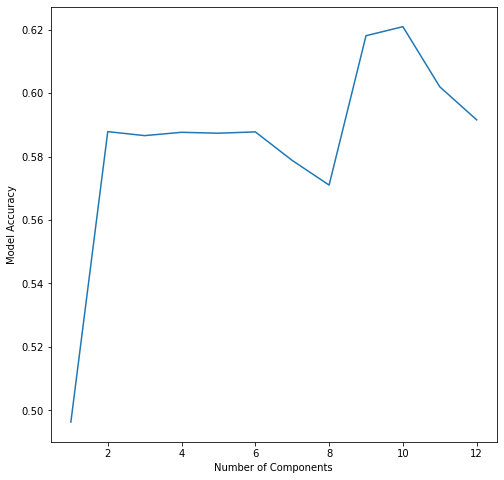

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(n_components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

In [19]:
# It looks like the optimal number of principal components is 2, with only a slight
# improvement by going to 9 componets

<IPython.core.display.Javascript object>